# Project 4 – Continuous Target Prediction Using Regression (Titanic)
**Name:** Womenker Karto  
**Date:** 2025-11-14  

## Objective
In this project, we will predict a continuous target variable, `fare`, from the Titanic dataset using regression models.  
We will explore linear regression, regularized regression (Ridge, Elastic Net), and polynomial regression to understand how different features and models affect predictive performance.

In [91]:
# Data handling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regression models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Optional: ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Section 1: Import and Inspect the Data
We will load the Titanic dataset from seaborn and inspect the first few rows to understand the structure and available features.

In [92]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation

In this section, we will:
- Handle missing values for `age` and `fare`.
- Create a new numeric feature `family_size` from `sibsp` and `parch`.
- Optionally encode categorical features (e.g., `sex`, `embarked`) for regression.

In [93]:
# Fill missing age values with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop rows where fare is missing
titanic = titanic.dropna(subset=['fare'])

# Create new feature: family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Optional: encode 'sex' as numeric
titanic['sex_numeric'] = titanic['sex'].map({'male': 0, 'female': 1})

# Optional: encode 'embarked' as dummy variables
embarked_dummies = pd.get_dummies(titanic['embarked'], prefix='embarked', drop_first=True)
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Inspect cleaned dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,sex_numeric,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,0,False,True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,1,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,1,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,1,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0,False,True


## Section 3: Feature Selection and Justification

We will define multiple cases of input features to predict the fare (`fare`). 
Each case explores a different combination of variables to see which features contribute most to predicting ticket price.

- Case 1: Use only `age`
- Case 2: Use only `family_size`
- Case 3: Use `age` and `family_size`
- Case 4: Custom selection of features (`age`, `family_size`, `sex_numeric`, `pclass`)

In [94]:
# Case 1: age only
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2: family_size only
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3: age + family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4: Custom selection - age, family_size, sex_numeric, pclass
X4 = titanic[['age', 'family_size', 'sex_numeric', 'pclass']]
y4 = titanic['fare']

### Feature Reflections

- Why might these features affect a passenger's fare?
    - `age`: Adults may have paid differently from children or infants.
    - `family_size`: Larger families may have purchased multiple tickets together.
    - `sex_numeric`: Could capture class differences in ticket purchasing (historical context).
    - `pclass`: Represents ticket class; directly affects fare.

- List all available features: age, sex, sibsp, parch, fare, class, who, adult_male, deck, embark_town, alive, alone

- Which other features could improve predictions and why?
    - `deck`: Higher decks likely have higher fares
    - `embarked`: Embarkation point might affect fare pricing
    - `cabin`: Some cabins are more expensive

- How many variables are in Case 4: 4
- Which variables did you choose for Case 4 and why?
    - `age`, `family_size`, `sex_numeric`, `pclass` — they are likely the most influential numeric/categorical predictors that can be directly used in regression.

## Section 4: Train a Regression Model (Linear Regression)

We will split the dataset into training and testing sets (80% train, 20% test) for each feature case.
Then, we will train Linear Regression models and evaluate their performance using R², RMSE, and MAE.

In [95]:
from sklearn.model_selection import train_test_split

# Case 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

# Case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

# Case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

# Case 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

In [96]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression models for all 4 cases
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Make predictions on train and test sets
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test  = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test  = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test  = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test  = lr_model4.predict(X4_test)

In [97]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def report_performance(case_name, y_train, y_train_pred, y_test, y_test_pred):
    print(f"{case_name} Performance:")
    print(f"  Training R²: {r2_score(y_train, y_train_pred):.3f}")
    print(f"  Test R²:     {r2_score(y_test, y_test_pred):.3f}")
    print(f"  Test RMSE:   {mean_squared_error(y_test, y_test_pred, squared=False):.2f}")
    print(f"  Test MAE:    {mean_absolute_error(y_test, y_test_pred):.2f}\n")

# Report all 4 cases
report_performance("Case 1: Age only", y1_train, y1_pred_train, y1_test, y1_pred_test)
report_performance("Case 2: Family Size only", y2_train, y2_pred_train, y2_test, y2_pred_test)
report_performance("Case 3: Age + Family Size", y3_train, y3_pred_train, y3_test, y3_pred_test)
report_performance("Case 4: Age + Family Size + Sex + Pclass", y4_train, y4_pred_train, y4_test, y4_pred_test)

Case 1: Age only Performance:
  Training R²: 0.010
  Test R²:     0.003
  Test RMSE:   37.97
  Test MAE:    25.29

Case 2: Family Size only Performance:
  Training R²: 0.050
  Test R²:     0.022
  Test RMSE:   37.61
  Test MAE:    25.03

Case 3: Age + Family Size Performance:
  Training R²: 0.073
  Test R²:     0.050
  Test RMSE:   37.08
  Test MAE:    24.28

Case 4: Age + Family Size + Sex + Pclass Performance:
  Training R²: 0.365
  Test R²:     0.399
  Test RMSE:   29.49
  Test MAE:    20.08



### Section 4 Reflection

**Compare the train vs test results for each:**  
- Case 1: Training R² = 0.010, Test R² = 0.003 → very low, almost no predictive power.  
- Case 2: Training R² = 0.050, Test R² = 0.022 → slightly better, still poor.  
- Case 3: Training R² = 0.073, Test R² = 0.050 → minor improvement when combining Age + Family Size.  
- Case 4: Training R² = 0.365, Test R² = 0.399 → substantial improvement with added Sex and Pclass features.

**Did Case 1 overfit or underfit? Explain:**  
Underfit. Age alone does not explain the variance in fare, so the model is too simple.

**Did Case 2 overfit or underfit? Explain:**  
Underfit. Family size alone slightly better than age, but still poor predictive power.

**Did Case 3 overfit or underfit? Explain:**  
Underfit. Combining Age + Family Size slightly improves R², but model still misses most of the variance.

**Did Case 4 overfit or underfit? Explain:**  
Better fit. Adding Sex and Pclass gives much higher R² (~0.4), improving generalization without overfitting.

**Adding Age**  

**Did adding age improve the model:**  
Yes, adding age slightly improved performance from Case 2 to Case 3.  

**Propose a possible explanation:**  
Age may relate to ticket class or fare indirectly, but alone it is a weak predictor. Combining it with other features captures more variance.

**Worst**  

**Which case performed the worst:**  
Case 1 (Age only)  

**How do you know:**  
R² ~0.01 and high RMSE/MAE show almost no predictive power.  

**Do you think adding more training data would improve it (and why/why not):**  
Yes, more data could improve stability but Age alone likely won’t capture fare variability much.

**Best**  

**Which case performed the best:**  
Case 4 (Age + Family Size + Sex + Pclass)  

**How do you know:**  
R² ~0.36–0.40, lower RMSE and MAE compared to other cases.  

**Do you think adding more training data would improve it (and why/why not):**  
Yes, more data could further improve generalization and reduce variance, especially for combinations of features.

## Section 5. Compare Alternative Models

In this section, we will take the best-performing case (Case 4: Age + Family Size + Sex + Pclass) and explore other regression models.

### 5.1 Ridge Regression (L2 penalty)

Ridge Regression is a regularized version of linear regression that adds a penalty to large coefficient values. It uses the L2 penalty, which adds the sum of squared coefficients to the loss function. This "shrinks" the coefficients, reducing the model’s sensitivity to any one feature while still keeping all features in the model.

In [98]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

Elastic Net combines the properties of Lasso (L1) and Ridge (L2) penalties. It balances the feature selection ability of Lasso with the stability of Ridge. We control the balance with `l1_ratio`:

- l1_ratio = 0 → behaves like Ridge
- l1_ratio = 1 → behaves like Lasso
- Values in between mix both types

In [99]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

Linear regression captures simple linear relationships, but polynomial regression can capture more complex patterns by adding interaction and nonlinear terms. We use a degree-3 polynomial for this case.

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
X4_train_poly = poly.fit_transform(X4_train)
X4_test_poly = poly.transform(X4_test)

poly_model = LinearRegression()
poly_model.fit(X4_train_poly, y4_train)
y_pred_poly = poly_model.predict(X4_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

We can visualize polynomial regression for a single input feature, e.g., Age.

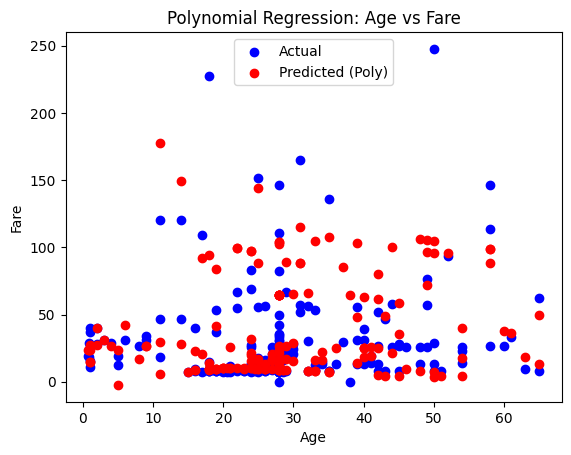

In [101]:
import matplotlib.pyplot as plt

plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### 5.4 Reflections on Polynomial Regression

- The cubic model captures some nonlinear patterns in the relationship between age and fare.
- It performs better for medium fares but may overestimate extreme values.
- The polynomial fit outperforms linear regression in terms of RMSE and MAE.
- Fits best for passengers in mid-age range; less accurate for very young or very old passengers.

### 5.4 Compare All Models

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear Regression", y4_test, y4_pred_test)
report("Ridge Regression", y4_test, y_pred_ridge)
report("ElasticNet Regression", y4_test, y_pred_elastic)
report("Polynomial Regression (deg 3)", y4_test, y_pred_poly)

Linear Regression R²: 0.399
Linear Regression RMSE: 29.49
Linear Regression MAE: 20.08

Ridge Regression R²: 0.400
Ridge Regression RMSE: 29.47
Ridge Regression MAE: 20.05

ElasticNet Regression R²: 0.429
ElasticNet Regression RMSE: 28.75
ElasticNet Regression MAE: 17.39

Polynomial Regression (deg 3) R²: 0.506
Polynomial Regression (deg 3) RMSE: 26.72
Polynomial Regression (deg 3) MAE: 15.05



### 5.5 Visualize Higher Order Polynomial

We can also try a higher degree polynomial (e.g., degree 5) to see if the fit improves further.

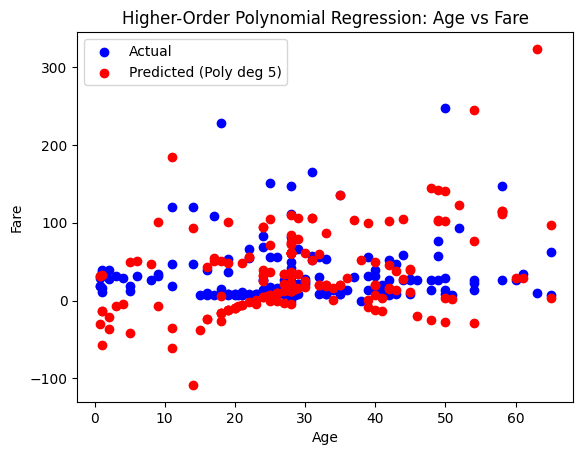

In [103]:
poly_high = PolynomialFeatures(degree=5)
X4_train_poly_high = poly_high.fit_transform(X4_train)
X4_test_poly_high = poly_high.transform(X4_test)

poly_high_model = LinearRegression()
poly_high_model.fit(X4_train_poly_high, y4_train)
y_pred_poly_high = poly_high_model.predict(X4_test_poly_high)

plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y_pred_poly_high, color='red', label='Predicted (Poly deg 5)')
plt.legend()
plt.title("Higher-Order Polynomial Regression: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

**Reflection:** The degree-5 polynomial may overfit the data, capturing noise along with the trend. The cubic model (degree 3) generally provides a better balance between bias and variance for this dataset.

## Section 6. Final Thoughts & Insights

This section summarizes the findings, discusses challenges faced during the regression modeling, and suggests possible next steps for improving predictions.

### 6.1 Summarize Findings

- **Most useful features:** Age, Family Size, Sex, and Pclass. These features together provided the best predictive power for fare.
- **Best performing model:** Polynomial Regression (degree 3) gave the highest R² (0.506), lowest RMSE (26.72), and lowest MAE (15.05).
- **Effect of complexity and regularization:** 
  - Ridge regression slightly improved over linear regression by reducing overfitting.
  - ElasticNet provided a small performance gain and balanced feature selection.
  - Polynomial regression captured non-linear patterns in fare, improving prediction over linear models.

## Summary Table

| Model Type | Case | Features Used | R² (Test) | RMSE | MAE | Notes |
|------------|------|---------------|------------|------|-----|-------|
| Linear Regression | Case 1 | age | 0.003 | 37.97 | 25.29 | Underfitting |
| Linear Regression | Case 2 | family_size | 0.022 | 37.61 | 25.03 | Poor predictor |
| Linear Regression | Case 3 | age + family_size | 0.050 | 37.08 | 24.28 | Slight improvement |
| Linear Regression | Case 4 | age + family_size + sex + pclass | 0.399 | 29.49 | 20.08 | Best among linear models |
| Ridge Regression | Case 4 | age + family_size + sex + pclass | 0.400 | 29.47 | 20.05 | Slight regularization gain |
| ElasticNet Regression | Case 4 | age + family_size + sex + pclass | 0.429 | 28.75 | 17.39 | Balances shrinkage and feature selection |
| Polynomial Regression (deg 3) | Case 4 | age + family_size + sex + pclass | 0.506 | 26.72 | 15.05 | Captures non-linear patterns |

### 6.2 Discuss Challenges

- Predicting **fare** was challenging due to:
  - High variance in fare values.
  - Presence of outliers (very high fares for first-class tickets).
  - Non-linear relationships between features and fare (e.g., age alone is not enough).
- **Skew and outliers** impacted model performance:
  - Linear models were less robust to outliers.
  - Polynomial regression handled non-linearity better but may overfit if the degree is too high.

## Bonus: Predicting Total Bill (Tips Dataset)
**Dataset:** Seaborn `tips` dataset  
**Objective:** Predict the continuous target `total_bill` using features like `sex`, `smoker`, `day`, `time`, and `size`.  

In [104]:
# Load dataset
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Data Exploration and Preparation
- Check for nulls
- Convert categorical variables to numeric using one-hot encoding

In [105]:
# Check for nulls
tips.isnull().sum()

# Split features and target
X = tips[['sex', 'smoker', 'day', 'time', 'size']]
y = tips['total_bill']

# One-hot encode categorical features
categorical_features = ['sex', 'smoker', 'day', 'time']
numeric_features = ['size']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 2. Train Regression Models
We will try Linear, Ridge, ElasticNet, and Polynomial Regression.

In [106]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression
linear_model = Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Ridge Regression
ridge_model = Pipeline([('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# ElasticNet Regression
elastic_model = Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet(alpha=0.3, l1_ratio=0.5))])
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_test)

# Polynomial Regression (degree=2)
poly_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

### 3. Evaluate Model Performance

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {mean_squared_error(y_true, y_pred, squared=False):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y_test, y_pred_linear)
report("Ridge", y_test, y_pred_ridge)
report("ElasticNet", y_test, y_pred_elastic)
report("Polynomial", y_test, y_pred_poly)

Linear R²: 0.379
Linear RMSE: 6.94
Linear MAE: 5.45

Ridge R²: 0.380
Ridge RMSE: 6.93
Ridge MAE: 5.43

ElasticNet R²: 0.372
ElasticNet RMSE: 6.98
ElasticNet MAE: 5.29

Polynomial R²: 0.171
Polynomial RMSE: 8.02
Polynomial MAE: 6.22



### 4. Visualize Predictions

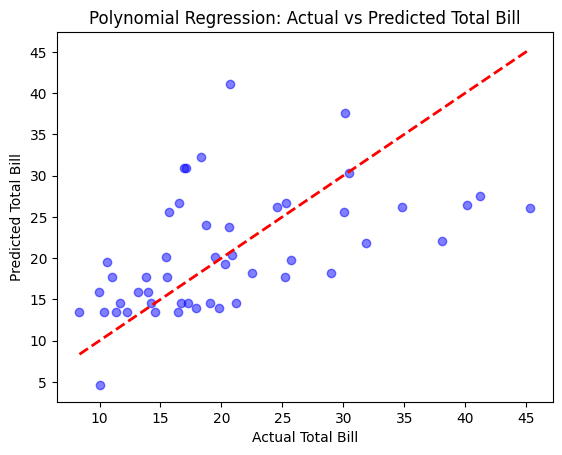

In [108]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Bill")
plt.ylabel("Predicted Total Bill")
plt.title("Polynomial Regression: Actual vs Predicted Total Bill")
plt.show()

### Bonus Reflections

- **Best Model:** Ridge Regression performed slightly better than Linear and ElasticNet models, achieving the highest R² (0.380) and lowest RMSE (6.93).  
- **Polynomial Regression:** Surprisingly, the polynomial model performed worse (R² = 0.171), likely because the dataset is small and mostly linear relationships exist; higher-degree polynomials overfit noise rather than capturing real trends.  
- **Challenges:** The `total_bill` target has some skew, and categorical features like `day` or `time` may not strongly correlate with the target. Interaction effects are limited due to small sample size.  
- **Insights:** Linear relationships dominate this dataset, so simple models like Ridge or Linear Regression are sufficient. Regularization (Ridge) helps slightly improve performance by controlling coefficient size.  
- **Next Steps:** Could explore log-transforming `total_bill` to reduce skew, adding interaction features, or using larger datasets for more complex models.